snippet-generator.app

사용자 코드 조각

임의의 단축키(함수)를 만드는것으로 해당 함수를 호출하면 지정한 코드가 호출된다.

(해당 코드가 실행되는것이 아닌 해당 코드가 해당 위치에 표현됨)

# BarPlot (막대 그래프)

집단별로 빈도수나 평균등의 집계 결과값을 표현하는 그래프

## #01. 준비과정
### [1] 패키지 참조

In [35]:
import sys 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager
from pandas import read_excel, DataFrame

### [2] 데이터 가져오기

In [36]:
# my_read_excel
origin = read_excel('https://data.hossam.kr/pydata/grade.xlsx', index_col='이름')
origin

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
영호,4,남자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,1,남자,91,90,89,80


### [3] 그래프 초기화

In [37]:
# my_plot_init
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

## #02. 세로 막대 그래프

### [1] 학년별 평균 데이터 구하기

In [38]:
df = origin.drop('성별',axis=1).groupby('학년',as_index=False).mean()
df

,학년,국어,영어,수학,과학
0,1,92.75,82.25,85.25,79.5
1,2,85.00,104.00,70.50,81.0
2,3,63.00,60.00,31.00,71.0
3,4,77.50,69.00,90.50,80.0


### [2] 그래프에 적용할 항목 선정

그래프에 적용 가능한 형태는 `list`, `tuple`, `ndarray`, `Series` 모두 가능

In [39]:
y = list(df['국어'])
x = list(range(len(y)))
xticks = ['%d학년' %(i+1) for i in x]
x, y, xticks

([0, 1, 2, 3], [92.75, 85.0, 63.0, 77.5], ['1학년', '2학년', '3학년', '4학년'])

### [3] 그래프 생성

`pyplot` 객체의 `bar(xdata, ydata)`메서드를 사용한다.

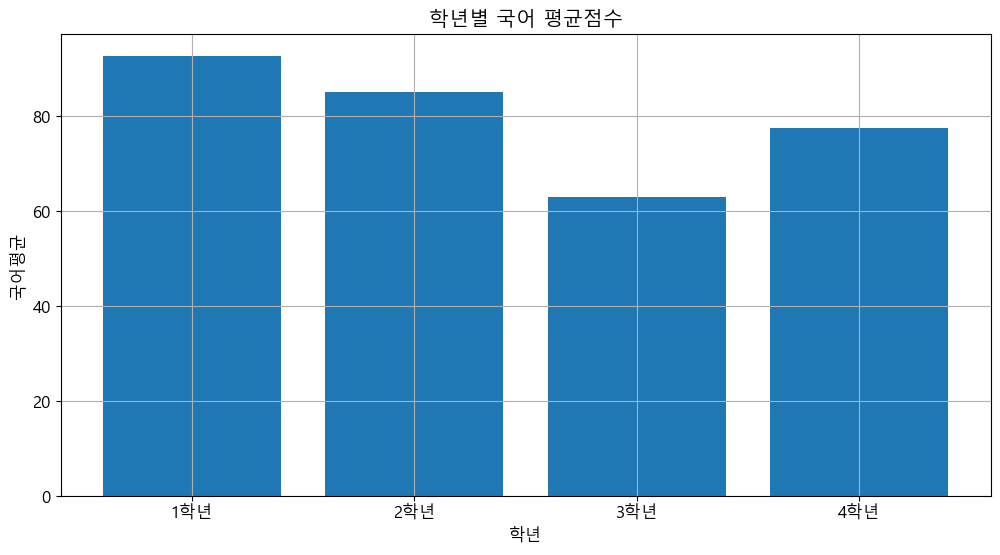

In [40]:
plt.figure()
plt.title('학년별 국어 평균점수')
plt.bar(x, y)
plt.xlabel('학년')
plt.xticks(x, xticks)
plt.ylabel('국어평균')
plt.grid()
plt.show()
plt.close()

### [4] 색상 지정하기

#### (1) 단색
`pyplot` 객체의 `bar()`메서드에 `color` 파라미터를 지정한다.

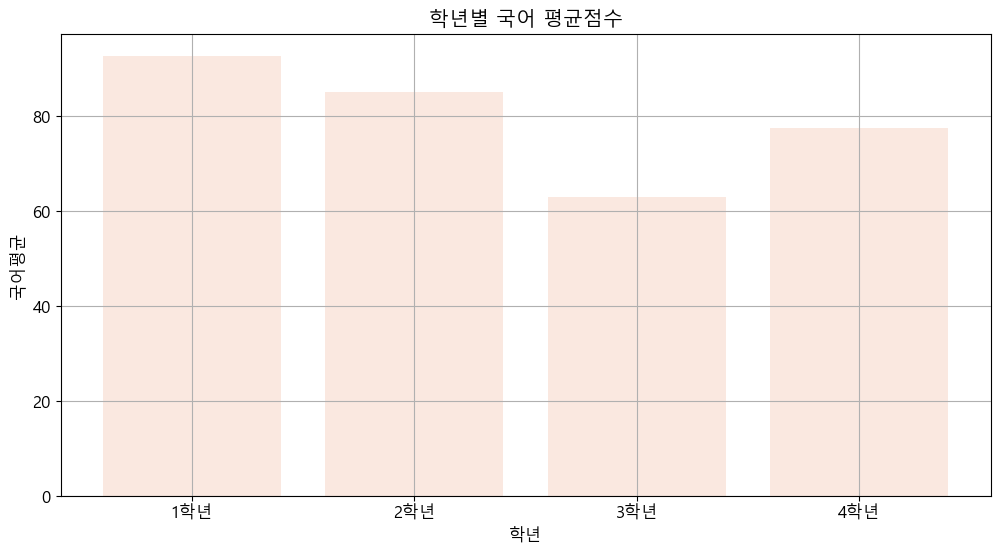

In [41]:
plt.figure()
plt.title('학년별 국어 평균점수')
plt.bar(x, y, color = '#FAE8E0')
plt.xlabel('학년')
plt.xticks(x, xticks)
plt.ylabel('국어평균')
plt.grid()
plt.show()
plt.close()

#### (2) 막대별로 개별 색상 지정하기
`color` 파라미터의 값을 리스트 형태로 지정한다.

리스트의 원소는 색상값을 의미하고, 막대의 수 만큼 원소를 갖는다.

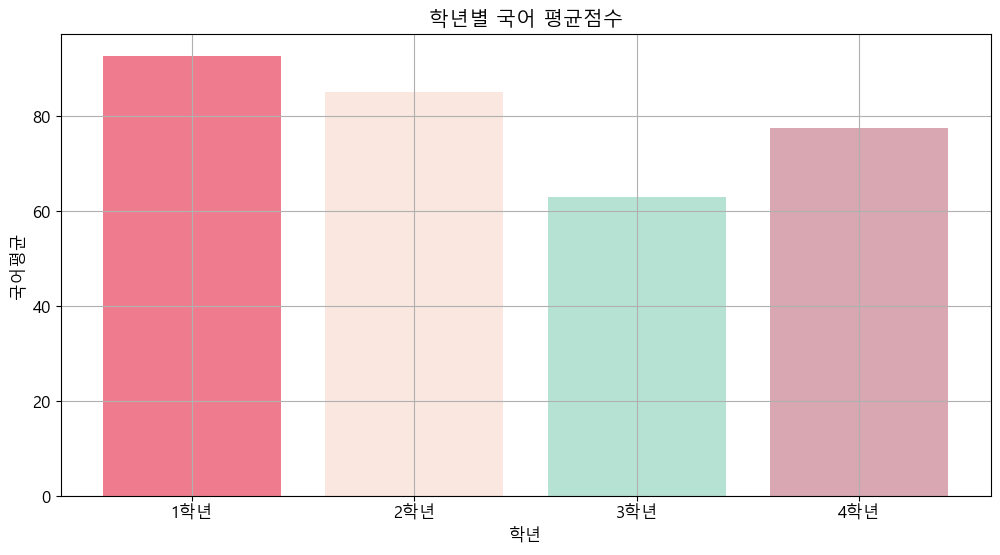

In [42]:
plt.figure()
plt.title('학년별 국어 평균점수')
plt.bar(x, y, color = ["#EF7C8E","#FAE8E0" ,"#B6E2D3" ,"#D8A7B1"])
plt.xlabel('학년')
plt.xticks(x, xticks)
plt.ylabel('국어평균')
plt.grid()
plt.show()
plt.close()

## #03. 가로 막대 그래프

가로 막대 그래프인 경우 `barh(ydata, xdata)` 메서드를 사용

In [45]:
x = list(df['국어'])
y = list(range(len(x)))
yticks = ['%d학년' %(i+1) for i in y]
x, y, xticks

([92.75, 85.0, 63.0, 77.5], [0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])

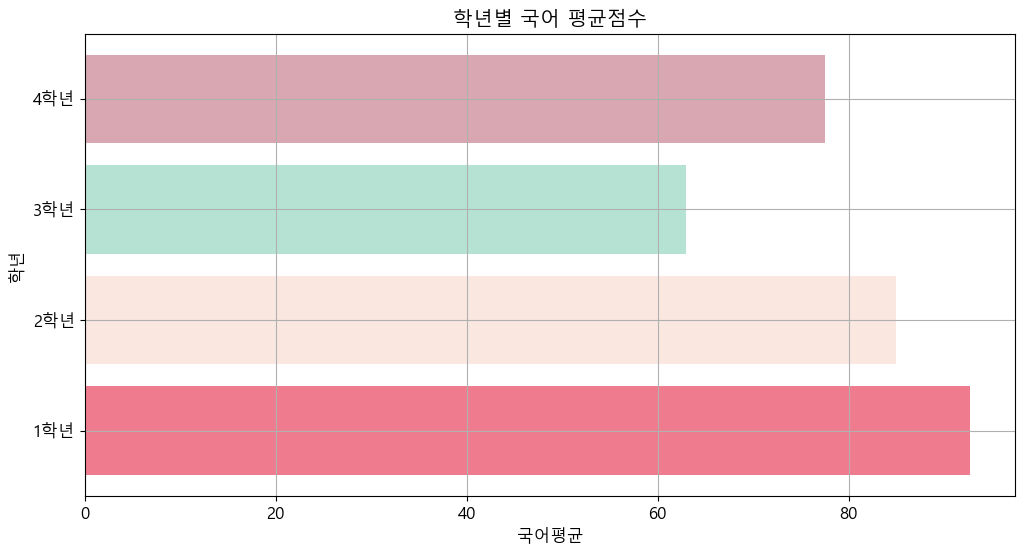

In [46]:
plt.figure()
plt.title('학년별 국어 평균점수')
plt.barh(y, x, color = ["#EF7C8E","#FAE8E0" ,"#B6E2D3" ,"#D8A7B1"])
plt.ylabel('학년')
plt.yticks(y, yticks)
plt.xlabel('국어평균')
plt.grid()
plt.show()
plt.close()

## #04. 세로 다중 막대 그래프

### [1] 변수 생성하기

다중 막대 그래프의 경우 `x`축을 좌표값(숫자)를 원소라 갖는 `ndarray`로 처리하는 것이 유리

In [47]:
y1 = list(df['국어'])
y2 = list(df['영어'])
x = np.arange(0, len(y1))
xticks = ['%d학년' %(i+1) for i in x]
x, y1, y2, xticks

(array([0, 1, 2, 3]),
 [92.75, 85.0, 63.0, 77.5],
 [82.25, 104.0, 60.0, 69.0],
 ['1학년', '2학년', '3학년', '4학년'])

### [2] 그래프그리기

각 막대의 넓이(`width`)를 지정하고 각 막대를 넓이의 `1/2` 씩 앞뒤로 이동시켜야 한다.

`width` 파라미터는 `0~1` 사이의 값을 갖는다.

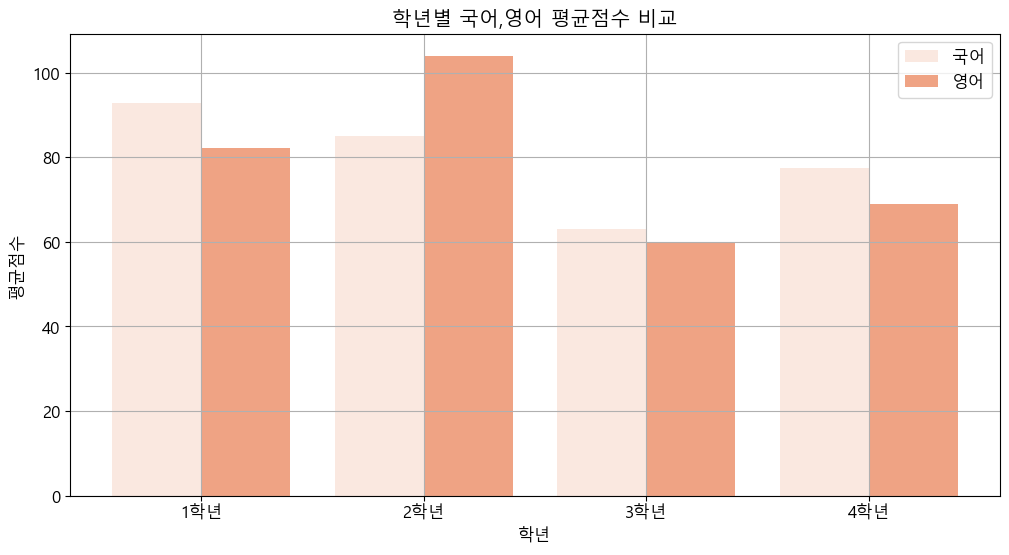

In [57]:
plt.figure()
plt.title('학년별 국어,영어 평균점수 비교')
plt.bar(x-0.2, y1, color = '#FAE8E0', label = '국어', width = 0.4)
plt.bar(x+0.2, y2, color = '#EFA384', label = '영어', width = 0.4)
plt.legend()
plt.xlabel('학년')
plt.xticks(x, xticks)
plt.ylabel('평균점수')
plt.grid()
plt.show()
plt.close()

## #05. 가로 다중 막대 그래프
### [1] 변수 생성하기

In [58]:
x1 = list(df['국어'])
x2 = list(df['영어'])
y = np.arange(0, len(x1))
yticks = ['%d학년' %(i+1) for i in x]
y, x1, x2, yticks

(array([0, 1, 2, 3]),
 [92.75, 85.0, 63.0, 77.5],
 [82.25, 104.0, 60.0, 69.0],
 ['1학년', '2학년', '3학년', '4학년'])

### [2] 그래프 그리기

가로 막대 그래프이므로 넓이(`width`)가 아닌 높이(`height`)를 조절해야 한다.

`x` 축 이동이 아닌 `y` 축 이동이 발생한다.

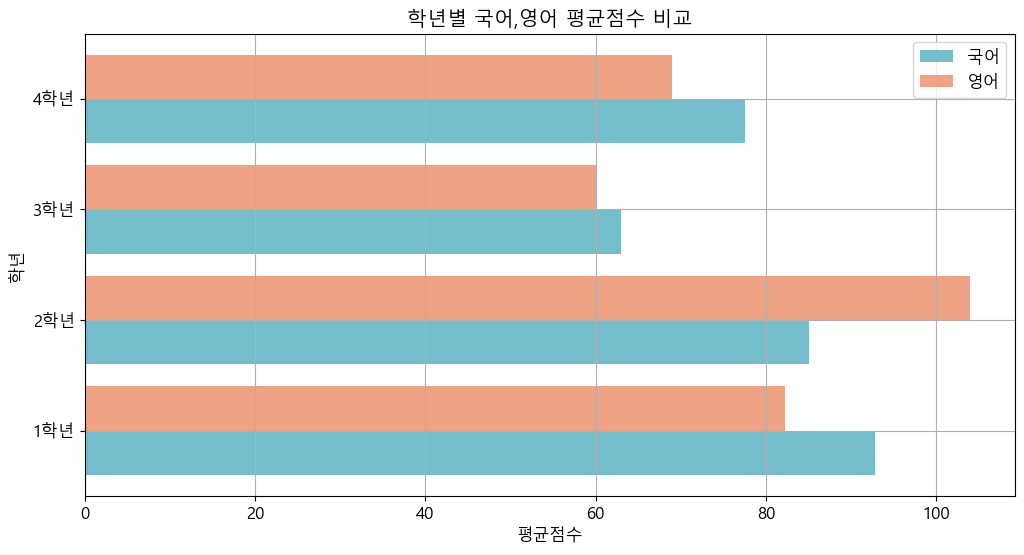

In [66]:
plt.figure()
plt.title('학년별 국어,영어 평균점수 비교')
plt.barh(y-0.2, x1, color = '#74BDCB', label = '국어', height = 0.4)
plt.barh(y+0.2, x2, color = '#EFA384', label = '영어', height = 0.4)
plt.legend()
plt.ylabel('학년')
plt.yticks(y, yticks)
plt.xlabel('평균점수')
plt.grid()
# plt.savefig('kkkk.png',dpi=300)
plt.show()
plt.close()